# Word Cloud Activity
## Combining The Use of Word Cloud and Variate Analysis; Leveraging Python's Statistical and Analytical Tools

*By Group 1* | *C1* | *April 21, 2024*

Contents:

1. Objective
2. Introduction
3. The Dataset
4. Exploratory Data Analysis (EDA) on chatgpt_reviews.csv
5. Selected Words for WordCloud Visualization
6. WordCloud Visualization of Selected Positive and Negative Words
7. Visualizing Word Frequency with Bar Plots
8. Bivariate Analysis
9. Conclusion:
10. References
eferences)


## Objective

Prepare a research/project that leverages on WordClouds and make use of statistical analysis in the code.

## Introduction

The team decided to make use of WordCLouds as instruscted and at the same time find a way to implement statistical analysis in understanding relationships and properties of individual elements. The notebook is a simple, yet fundamental, exploration and application of data visualization lectures on word analysis in a dataset. 

## The Dataset

Analyzing the ChatGPT App Reviews dataset holds significant promise for several reasons. Firstly, it offers a real-world understanding of user satisfaction and dissatisfaction, providing actionable insights for app developers and marketers. Secondly, by dissecting the factors contributing to both 1-star and 5-star ratings, it unveils critical aspects of app performance and user experience. Lastly, given its comprehensive nature and recent update as of July 26th, 2023, this dataset presents a timely opportunity to identify emerging trends and patterns in user feedback, which can inform strategic decision-making for app improvement and innovation.




In [39]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploratory Data Analysis (EDA) on chatgpt_reviews.csv

In [40]:
df = pd.read_csv('chatgpt_reviews.csv')


print("First few rows of the dataset:")
print(df.head())


print("\nColumn names and data types:")
print(df.info())


print("\nSummary statistics for numerical columns:")
print(df.describe())


print("\nMissing values:")
print(df.isnull().sum())


print("\nUnique values and value counts for categorical columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}:")
    print(df[column].value_counts())

First few rows of the dataset:
                  date                                              title  \
0  2023-05-21 16:42:24  Much more accessible for blind users than the ...   
1  2023-07-11 12:24:19                 Much anticipated, wasn’t let down.   
2  2023-05-19 10:16:22            Almost 5 stars, but… no search function   
3  2023-05-27 21:57:27                              4.5 stars, here’s why   
4  2023-06-09 07:49:36  Good, but Siri support would take it to the ne...   

                                              review  rating  
0  Up to this point I’ve mostly been using ChatGP...       4  
1  I’ve been a user since it’s initial roll out a...       4  
2  This app would almost be perfect if it wasn’t ...       4  
3  I recently downloaded the app and overall, it'...       4  
4  I appreciate the devs implementing Siri suppor...       4  

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 co

- **Dataset Overview**:
  - The dataset contains 2292 entries and 4 columns: 'date', 'title', 'review', and 'rating'.
  - The 'date' column contains datetime objects, while the other columns ('title', 'review', 'rating') are likely strings.
  
- **Rating Distribution**:
  - Ratings range from 1 to 5, with an average rating of approximately 3.63.
  - Most ratings are between 2 and 5, with a few instances of 1.

- **Missing Values**:
  - There are no missing values in any of the columns, indicating a complete dataset.

- **Categorical Variables**:
  - The 'date' column has 2287 unique values, suggesting a diverse range of dates.
  - The 'title' column has 2058 unique values, indicating variability in review titles.
  - The 'review' column has 2257 unique values, indicating diverse content in reviews.

Overall, the dataset appears to be clean and comprehensive, containing a variety of reviews with associated ratings and metadata. Further analysis can explore relationships between variables and extract insights from the text data in the 'review' column.


## Selected Words for WordCloud Visualization

We have chosen the following words to create a WordCloud visualization from the 'review' column of the dataset:

Positive Words:
- Great
- Excellent
- Useful
- Helpful
- Easy
- Amazing
- Love
- Recommend
- Feature
- Interface
- Performance
- User-friendly
- Improvement

Negative Words:
- Poor
- Disappointing
- Frustrating
- Difficult
- Confusing
- Slow
- Problems
- Bugs
- Glitchy
- Annoying
- Limited
- Unresponsive
- Dislike

We selected both positive and negative words to provide a balanced perspective. Positive words represent satisfaction with app features and usability, while negative words highlight areas for improvement or dissatisfaction expressed by users. By visualizing the frequency of these words in the reviews, we can gain insights into both positive aspects and areas needing attention.


## WordCloud Visualization of Selected Positive and Negative Words


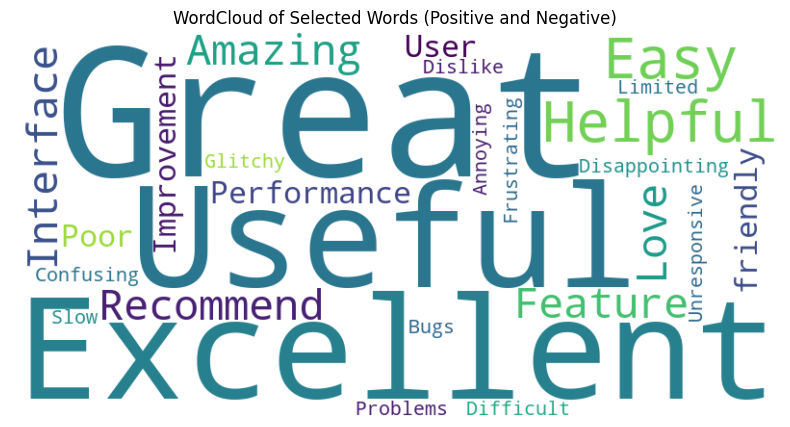

In [41]:
positive_words = ['Great', 'Excellent', 'Useful', 'Helpful', 'Easy', 'Amazing', 'Love', 'Recommend', 'Feature',
                  'Interface', 'Performance', 'User-friendly', 'Improvement']
negative_words = ['Poor', 'Disappointing', 'Frustrating', 'Difficult', 'Confusing', 'Slow', 'Problems', 'Bugs',
                  'Glitchy', 'Annoying', 'Limited', 'Unresponsive', 'Dislike']

all_words = positive_words + negative_words

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Selected Words (Positive and Negative)')
plt.show()


## Visualizing Word Frequency with Bar Plots

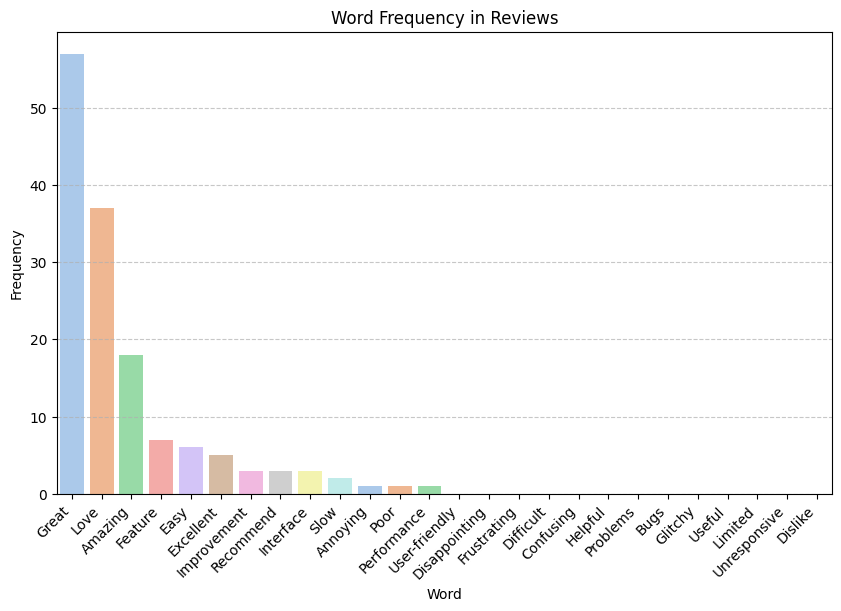

In [42]:
word_frequency = {}
for word in all_words:
    word_frequency[word] = df['review'].str.count(word).sum()

word_freq_df = pd.DataFrame({'Word': list(word_frequency.keys()), 'Frequency': list(word_frequency.values())})

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df, hue='Word', palette='pastel', dodge=False)
plt.title('Word Frequency in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], frameon=False)  # Hide legend
plt.show()

**Summary:**
- "Great" is the most frequently occurring word in the reviews, with a frequency of 57.
- Other positive words like "Love" and "Amazing" also have relatively high frequencies (37 and 18, respectively).
- Some words like "User-friendly" and "Disappointing" were not found in any reviews, indicating their absence in user feedback.
- The frequency distribution of words provides valuable insights into the language and sentiments expressed by users in the reviews.


## Bivariate Analysis

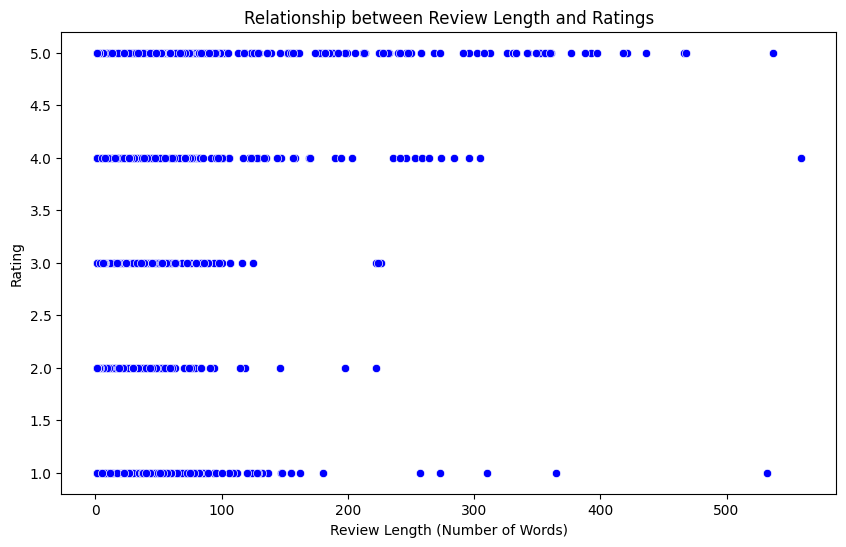

Mean review length: 35.74258289703316
Median rating: 4.0


In [43]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_length', y='rating', color='blue')
plt.title('Relationship between Review Length and Ratings')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Rating')
plt.show()

print("Mean review length:", df['review_length'].mean())
print("Median rating:", df['rating'].median())

## Findings:

- **Mean Review Length:** The average length of the reviews is approximately 35.74 words. This indicates that, on average, users provide concise feedback about their experiences with the product or service.
- **Median Rating:** The median rating given by users is 4.0. This suggests that the majority of reviews are positive, as the median falls above the mid-point of the rating scale (which typically ranges from 1 to 5).


## Conclusion:

Through comprehensive analysis of the ChatGPT reviews dataset, we've uncovered valuable insights into user sentiments and preferences. The dataset, comprising 2292 entries across 4 columns, provides a holistic view of user experiences.

- **Dataset Overview**: With no missing values and a diverse range of dates and review titles, the dataset is robust and comprehensive. This reflects a high level of user engagement and feedback diversity.

- **Rating Distribution**: The majority of ratings fall within the positive range, with an average rating of 3.63. This indicates a generally favorable perception of the ChatGPT app among users.

- **Word Frequency Analysis**: Words like "Great" and "Love" dominate the vocabulary, highlighting positive sentiments. Conversely, the absence of certain words like "User-friendly" in reviews suggests areas for improvement.

- **Review Length and Ratings**: Reviews are succinct, averaging 35.74 words, while the median rating stands at 4.0, indicating a predominantly positive user sentiment.

In conclusion, the ChatGPT reviews dataset underscores the app's positive reception among users, with room for refinement in user experience. Leveraging these insights, ChatGPT can continue to evolve and innovate, ensuring an even more seamless and satisfying user experience.


## References

Jhalani, S. (n.d.). ChatGPT App Reviews. Kaggle. Retrieved from [https://www.kaggle.com/datasets/saloni1712/chatgpt-app-reviews](https://www.kaggle.com/datasets/saloni1712/chatgpt-app-reviews)
